## Summary Redshift Catalogs

### Working with the zall-pix file

In [110]:
from astropy.table import Table, vstack, Column

zpix_cat = Table.read('zall-pix-edr-vac.fits', hdu="ZCATALOG")



In [111]:
print(zpix_cat.columns)

<TableColumns names=('TARGETID','SURVEY','PROGRAM','HEALPIX','SPGRPVAL','Z','ZERR','ZWARN','CHI2','COEFF','NPIXELS','SPECTYPE','SUBTYPE','NCOEFF','DELTACHI2','COADD_FIBERSTATUS','TARGET_RA','TARGET_DEC','PMRA','PMDEC','REF_EPOCH','FA_TARGET','FA_TYPE','OBJTYPE','SUBPRIORITY','OBSCONDITIONS','RELEASE','BRICKNAME','BRICKID','BRICK_OBJID','MORPHTYPE','EBV','FLUX_G','FLUX_R','FLUX_Z','FLUX_W1','FLUX_W2','FLUX_IVAR_G','FLUX_IVAR_R','FLUX_IVAR_Z','FLUX_IVAR_W1','FLUX_IVAR_W2','FIBERFLUX_G','FIBERFLUX_R','FIBERFLUX_Z','FIBERTOTFLUX_G','FIBERTOTFLUX_R','FIBERTOTFLUX_Z','MASKBITS','SERSIC','SHAPE_R','SHAPE_E1','SHAPE_E2','REF_ID','REF_CAT','GAIA_PHOT_G_MEAN_MAG','GAIA_PHOT_BP_MEAN_MAG','GAIA_PHOT_RP_MEAN_MAG','PARALLAX','PHOTSYS','PRIORITY_INIT','NUMOBS_INIT','CMX_TARGET','DESI_TARGET','BGS_TARGET','MWS_TARGET','SCND_TARGET','SV1_DESI_TARGET','SV1_BGS_TARGET','SV1_MWS_TARGET','SV1_SCND_TARGET','SV2_DESI_TARGET','SV2_BGS_TARGET','SV2_MWS_TARGET','SV2_SCND_TARGET','SV3_DESI_TARGET','SV3_BGS_TARGE

In [112]:
zpix_cat[0:5]

TARGETID,SURVEY,PROGRAM,HEALPIX,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,CMX_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,SV1_SCND_TARGET,SV2_DESI_TARGET,SV2_BGS_TARGET,SV2_MWS_TARGET,SV2_SCND_TARGET,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,SV_NSPEC,SV_PRIMARY,ZCAT_NSPEC,ZCAT_PRIMARY,MIN_MJD,MEAN_MJD,MAX_MJD,FIRSTNIGHT,LASTNIGHT
int64,bytes7,bytes6,int32,int32,float64,float64,int64,float64,float64[10],int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,bytes8,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,bool,int64,bool,float64,float64,float64,int32,int32
39628473198708395,cmx,other,2154,2154,-0.0019956912923479522,4.1311493573349107e-48,1570,8.999999999999996e+99,0.0 .. 0.0,0,STAR,CV,3,1.942668892225729e+84,512,23.661967677367254,29.84758879289675,0.0,0.0,2020.9597,9007199254742016,1,TGT,0.3743222091683128,7,9010,--,494512,1707,DEV,0.056008916,0.8742358,4.4879527,14.53286,40.183647,23.470558,846.09424,161.24467,27.071745,-1.0,-1.0,0.30432662,1.5622828,5.0589743,0.30432662,1.5622828,5.0589743,0,4.0,1.4857041,-0.47312373,0.34610084,0,--,0.0,0.0,0.0,0.0,S,3200,1,9007199254742016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.661967677367254,29.84758879289675,0,0.0,0,0,0.0,0.0,0.0,0.0,23.6619676773673,0.0,29.8475887928968,0.0,0.7702122,334.5758,0.23833227,63.154266,251.84634,1200.8414,489.7509,6.6365247,1.7938427,29931.836,67.48044,5253.2964,0.107736714,5998.398,33749.49,20.86845,95.85028,4.4280867e-05,226.88919,8.178434e-06,0.0,9751.99,5.995135e-05,48.05161,102.743744,30266.412,294.60797,5316.4507,251.95409,16951.23,34239.24,75.55658,200.38788,0,False,1,True,59200.06640136,59200.095110124996,59200.12381137,20201216,20201216
39628473198709499,cmx,other,2154,2154,0.797663336968385,6.764807540963103e-05,0,8562.711500316858,173.84545793773444 .. 3.5471443000513863,7928,GALAXY,--,10,1111.0357974395156,0,23.711764237454403,29.843726508418328,0.0,0.0,2020.9597,9007199254742016,1,TGT,0.6556303597015493,7,9010,--,494512,2811,DEV,0.055015083,0.37260255,2.0997107,11.454535,42

## Coadded Spectra (without desi.spec.io)

In [51]:
from astropy.io import fits

target_url = 'https://data.desi.lbl.gov/public/edr/spectro/redux/fuji/healpix/sv3/dark/101/10154/coadd-sv3-dark-10154.fits'

h_coadd = fits.open(target_url)
h_coadd.info()

Filename: /Users/s2537809/.astropy/cache/download/url/9f6a0f6c79bf4b855e4fe61371d4124a/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   ()      
  1  FIBERMAP      1 BinTableHDU    197   3572R x 70C   [K, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E]   
  2  EXP_FIBERMAP    1 BinTableHDU     64   7118R x 26C   [K, J, D, J, J, D, J, D, I, J, K, J, J, E, E, E, D, D, K, D, D, D, D, D, D, D]   
  3  B_WAVELENGTH    1 ImageHDU        10   (2751,)   float64   
  4  B_FLUX        1 ImageHDU        11   (2751, 3572)   float32   
  5  B_IVAR        1 ImageHDU        11   (2751, 3572)   float32   
  6  B_MASK        1 ImageHDU        12   (2751, 3572)   int32 (rescales to uint32)   
  7  B_RESOLUTION    1 ImageHDU        11   (2751, 11, 3572)   float32   
  8  R_WAVELEN

In [113]:

coadd_spec_wave_B = h_coadd[3].data
coadd_spec_wave_R = h_coadd[8].data
coadd_spec_wave_Z = h_coadd[13].data


coadd_spec_flux_B = h_coadd[4].data
coadd_spec_flux_R = h_coadd[9].data
coadd_spec_flux_Z = h_coadd[14].data


In [114]:
coadd_spec_flux_B[0] 

array([ 2.3727908 ,  0.07030493,  3.9498966 , ...,  0.52032614,
       -0.13493818,  0.38862488], dtype=float32)

In [127]:
#create a table to store the arrays of each flux so can check for any peaks
import numpy as np
from astropy.table import Table


import numpy as np
from astropy.table import Table, Column

# Define the number of columns
n_columns = 3572  

# Create an empty table
flux_B = Table()

# Generate data for the columns
for n in range(n_columns):
    col_name = f'coadd_spec_flux_B[{n}]'
    col_data = convolve(coadd_spec_flux_B[n], Gaussian1DKernel(5)) #adding the convolve means it tracks to the black line 
    flux_B.add_column(Column(data=col_data, name=col_name))


# Define the number of columns
n_columns = 3572  

# Create an empty table
flux_R = Table()

# Generate data for the columns
for n in range(n_columns):
    col_name = f'coadd_spec_flux_R[{n}]'
    col_data = convolve(coadd_spec_flux_R[n], Gaussian1DKernel(5)) #adding the convolve means it tracks to the black line  
    flux_R.add_column(Column(data=col_data, name=col_name))



# Define the number of columns
n_columns = 3572  

# Create an empty table
flux_Z = Table()

# Generate data for the columns
for n in range(n_columns):
    col_name = f'coadd_spec_flux_Z[{n}]'
    col_data = convolve(coadd_spec_flux_Z[n], Gaussian1DKernel(5)) #adding the convolve means it tracks to the black line  
    flux_Z.add_column(Column(data=col_data, name=col_name))



flux_Z



<Table length=2881>
coadd_spec_flux_Z[0] coadd_spec_flux_Z[1] ... coadd_spec_flux_Z[3571]
      float32              float32        ...         float32        
-------------------- -------------------- ... -----------------------
          0.21752615            1.1336833 ...              0.17663212
          0.25545526            1.3031331 ...              0.20172518
          0.29236475             1.465447 ...               0.2264237
          0.32710004             1.615503 ...              0.25034446
          0.35906374            1.7494667 ...              0.27323684
           0.3882381            1.8649012 ...              0.29488516
           0.4151886            1.9607457 ...              0.31513643
            0.440819             2.037149 ...              0.33385515
          0.46612233            2.0951886 ...              0.35092506
           0.4918253            2.1366105 ...              0.36625212
                 ...                  ... ...                     ...
           0.3105922            2.1759355 ...               0.2348721
          0.30893064            2.1425562 ...              0.23476818
           0.3063901            2.0953321 ...              0.23049313
          0.30190453            2.0307891 ...              0.22219765
           0.2944659            1.9462259 ...              0.21014316
          0.28343493            1.8400468 ...              0.19470668
          0.26841193            1.7122439 ...                0.176457
          0.24947174             1.564633 ...              0.15615556
            0.227073            1.4009122 ...               0.1346825
          0.20204143            1.2263983 ...              0.11303243

In [108]:
### need to make a way of determining if any value in a table exceeds mod 5





In [167]:
#attempt 2 This is better use this with tables above 

from astropy.table import Table

def columns_exceeding_threshold(table, threshold):
    """
    Get column names in an Astropy table where one or more values exceed +/- threshold.

    Parameters:
    - table: Astropy table
        The table to check for exceeding values.
    - threshold: float, optional
        The threshold value for checking if any value exceeds +/- threshold.

    Returns:
    - list
        A list of column names with values exceeding +/- threshold.
    """
    exceeding_columns = []
    for col_name in table.colnames:
        column = table[col_name]
        if any((abs(column)- mean(column)) > threshold): #see if any column value differs from the mean by a threshold value 
            exceeding_columns.append(col_name)
    return exceeding_columns


# Get column names with values exceeding +/- x in each table 
exceeding_cols_B = columns_exceeding_threshold(flux_B, threshold=15)
exceeding_cols_R = columns_exceeding_threshold(flux_R, threshold=15)
exceeding_cols_Z = columns_exceeding_threshold(flux_Z, threshold=15)

# Print the column names
if exceeding_cols_B:
    print("Columns in flux_B with values exceeding the mean by +/- 20:", exceeding_cols_B)
else:
    print("No columns in flux_B have values exceeding the mean by +/- 20")

if exceeding_cols_R:
    print("Columns in flux_R with values exceeding the mean by +/- 20:", exceeding_cols_R)
else:
    print("No columns in flux_R have values exceeding the mean by +/- 20")

if exceeding_cols_Z:
    print("Columns in flux_Z with values exceeding the mean by +/- 20:", exceeding_cols_Z)
else:
    print("No columns in flux_Z have values exceeding the mean by +/- 20")



Columns in flux_B with values exceeding the mean by +/- 20: ['coadd_spec_flux_B[86]', 'coadd_spec_flux_B[821]', 'coadd_spec_flux_B[1090]', 'coadd_spec_flux_B[1251]', 'coadd_spec_flux_B[1254]', 'coadd_spec_flux_B[1287]', 'coadd_spec_flux_B[1290]', 'coadd_spec_flux_B[1341]', 'coadd_spec_flux_B[1401]', 'coadd_spec_flux_B[1593]', 'coadd_spec_flux_B[2736]']
Columns in flux_R with values exceeding the mean by +/- 20: ['coadd_spec_flux_R[821]', 'coadd_spec_flux_R[1090]', 'coadd_spec_flux_R[1153]', 'coadd_spec_flux_R[1632]', 'coadd_spec_flux_R[1665]', 'coadd_spec_flux_R[1941]']
Columns in flux_Z with values exceeding the mean by +/- 20: ['coadd_spec_flux_Z[821]', 'coadd_spec_flux_Z[1234]']


In [ ]:
[86,821,1090,1153,1234,1251,1254,1287,1290,1341,1401,1593,1632,1665,1941,2736]

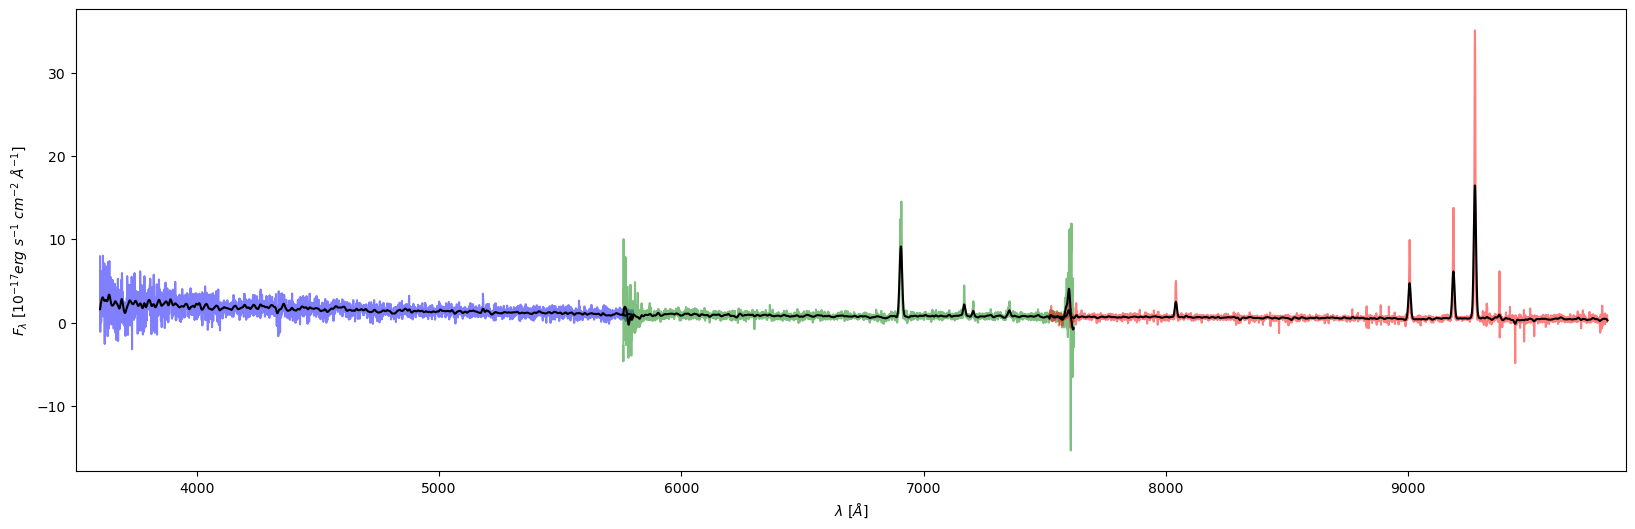

In [207]:
from astropy.table import Table
from astropy.convolution import convolve, Gaussian1DKernel

import matplotlib 
import matplotlib.pyplot as plt

x = 1234
# Plotting this spectra -

plt.figure(figsize = (20, 6))
# Plot the spectrum from each arm (B,R,Z) in blue, green, red

plt.plot(coadd_spec_wave_B, coadd_spec_flux_B[x], color = 'b', alpha = 0.5)
plt.plot(coadd_spec_wave_R, coadd_spec_flux_R[x], color = 'g', alpha = 0.5)
plt.plot(coadd_spec_wave_Z, coadd_spec_flux_Z[x], color = 'r', alpha = 0.5)
# Over-plotting smoothed spectra in black for all the three arms
plt.plot(coadd_spec_wave_B, convolve(coadd_spec_flux_B[x], Gaussian1DKernel(5)), color = 'k')
plt.plot(coadd_spec_wave_R, convolve(coadd_spec_flux_R[x], Gaussian1DKernel(5)), color = 'k')
plt.plot(coadd_spec_wave_Z, convolve(coadd_spec_flux_Z[x], Gaussian1DKernel(5)), color = 'k')
plt.xlim([3500, 9900])
#plt.ylim(-100,100)
plt.xlabel('$\lambda$ [$\AA$]')
plt.ylabel('$F_{\lambda}$ [$10^{-17} erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')
plt.show()

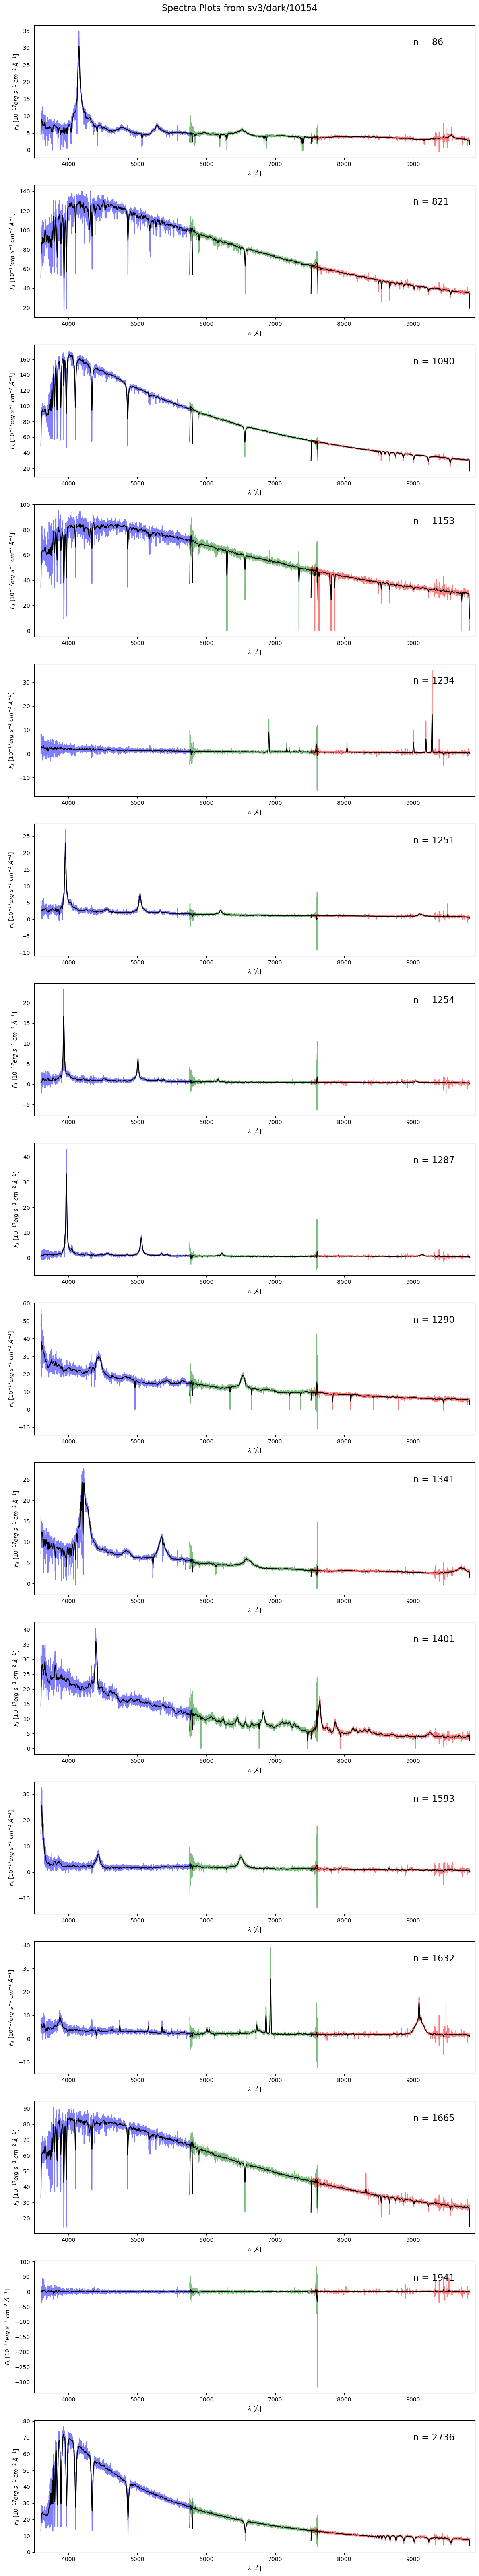

In [231]:
# Number of spectra 
n = [86,821,1090,1153,1234,1251,1254,1287,1290,1341,1401,1593,1632,1665,1941,2736]

fig, ax = plt.subplots(len(n), 1, figsize=(12, 4 * len(n)))  # Adjust figsize as needed

fig.suptitle("Spectra Plots from sv3/dark/10154", fontsize=16, y=1)

for i, jj in enumerate(n):
    ax[i].plot(coadd_spec_wave_B, coadd_spec_flux_B[jj], color='b', alpha=0.5)
    ax[i].plot(coadd_spec_wave_R, coadd_spec_flux_R[jj], color='g', alpha=0.5)
    ax[i].plot(coadd_spec_wave_Z, coadd_spec_flux_Z[jj], color='r', alpha=0.5)
    # Over-plotting smoothed spectra in black for all the three arms
    ax[i].plot(coadd_spec_wave_B, convolve(coadd_spec_flux_B[jj], Gaussian1DKernel(5)), color='k')
    ax[i].plot(coadd_spec_wave_R, convolve(coadd_spec_flux_R[jj], Gaussian1DKernel(5)), color='k')
    ax[i].plot(coadd_spec_wave_Z, convolve(coadd_spec_flux_Z[jj], Gaussian1DKernel(5)), color='k')
    ax[i].set_xlim([3500, 9900])
    ax[i].set_xlabel('$\lambda$ [$\AA$]')
    ax[i].set_ylabel('$F_{\lambda}$ [$10^{-17} erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')

    trans = ax[i].get_xaxis_transform()
    ax[i].annotate(f'n = {jj}' , xy = (9000, 0.85), xycoords = trans, fontsize = 16)
   
plt.tight_layout()

plt.savefig("plots.png")
plt.show()


## Coadded Spectra (with desi.spec.io)

In [19]:
from astropy.io import fits

#change below according to what spectra you want to view
target_url = 'https://data.desi.lbl.gov/public/edr/spectro/redux/fuji/healpix/sv3/bright/101/10154/coadd-sv3-bright-10154.fits'

h_rr = fits.open(target_url)
#h_rr = fits.open('coadd-sv3-bright-10151.fits')
h_rr.info()
h_rr.close()

Filename: /Users/s2537809/.astropy/cache/download/url/f92207bfa45d809b9f1c7567067a02cf/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   ()      
  1  FIBERMAP      1 BinTableHDU    197   3113R x 70C   [K, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E]   
  2  EXP_FIBERMAP    1 BinTableHDU     64   5274R x 26C   [K, J, D, J, J, D, J, D, I, J, K, J, J, E, E, E, D, D, K, D, D, D, D, D, D, D]   
  3  B_WAVELENGTH    1 ImageHDU        10   (2751,)   float64   
  4  B_FLUX        1 ImageHDU        11   (2751, 3113)   float32   
  5  B_IVAR        1 ImageHDU        11   (2751, 3113)   float32   
  6  B_MASK        1 ImageHDU        12   (2751, 3113)   int32 (rescales to uint32)   
  7  B_RESOLUTION    1 ImageHDU        11   (2751, 11, 3113)   float32   
  8  R_WAVELEN

In [20]:
import sys
sys.path.append('/Users/s2537809/DESI/desispec/py')
sys.path.append('/Users/s2537809/DESI/desimodel/py')
sys.path.append('/Users/s2537809/DESI/desitarget/py')
sys.path.append('/Users/s2537809/DESI/desiutil/py')

#from desispec.io import read_spectra

# import DESI related modules - 
from desimodel.footprint import radec2pix      # For getting healpix values
import desispec.io                             # Input/Output functions related to DESI spectra
from desispec import coaddition                # Functions related to coadding the spectra


In [39]:

# This still means I am downloading the data and then inputting it
#rather than automaing it from online and getting a random selection of spectra

coadd_spec = desispec.io.read_spectra('coadd-sv3-bright-10154.fits')
coadd_tgts = coadd_spec.target_ids().data


INFO:spectra.py:372:read_spectra: iotime 2.048 sec to read coadd-sv3-bright-10154.fits at 2023-09-20T14:35:26.493018


In [40]:
coadd_spec.wave


{'b': array([3600. , 3600.8, 3601.6, ..., 5798.4, 5799.2, 5800. ]),
 'r': array([5760. , 5760.8, 5761.6, ..., 7618.4, 7619.2, 7620. ]),
 'z': array([7520. , 7520.8, 7521.6, ..., 9822.4, 9823.2, 9824. ])}

In [41]:
coadd_spec.flux

{'b': array([[ -2.28738523, -25.16202164, -13.15711403, ...,   1.24502194,
           0.73345888,   0.606574  ],
        [ -7.53224421,  -0.54388642,   1.34305024, ...,   1.64098346,
           1.55232882,   1.78546488],
        [  7.53519201,   8.06216621,   0.49498197, ...,   2.43059826,
           1.54074109,   3.02142859],
        ...,
        [ -0.91106331, -10.48640728, -19.30093002, ...,   3.26117992,
           2.96016693,   1.31433606],
        [ 15.49705887,  -2.30444455,  18.32552147, ...,   0.29746324,
          -1.87864304,   0.75343126],
        [  8.4434042 ,  38.53904343,  14.61012363, ...,  75.75662231,
          77.95968628,  83.10085297]]),
 'r': array([[-12.90165138,  -0.19461603,  10.09557629, ...,  11.34338284,
          -4.88864136,  -0.18030466],
        [  3.08306599,  10.38194466,   1.0161494 , ...,   2.21913218,
          -0.53065914,  -4.53860283],
        [ -5.38596201,  15.52091694,  10.40589523, ...,   8.68083096,
          -1.81616914,   4.45590782],
   

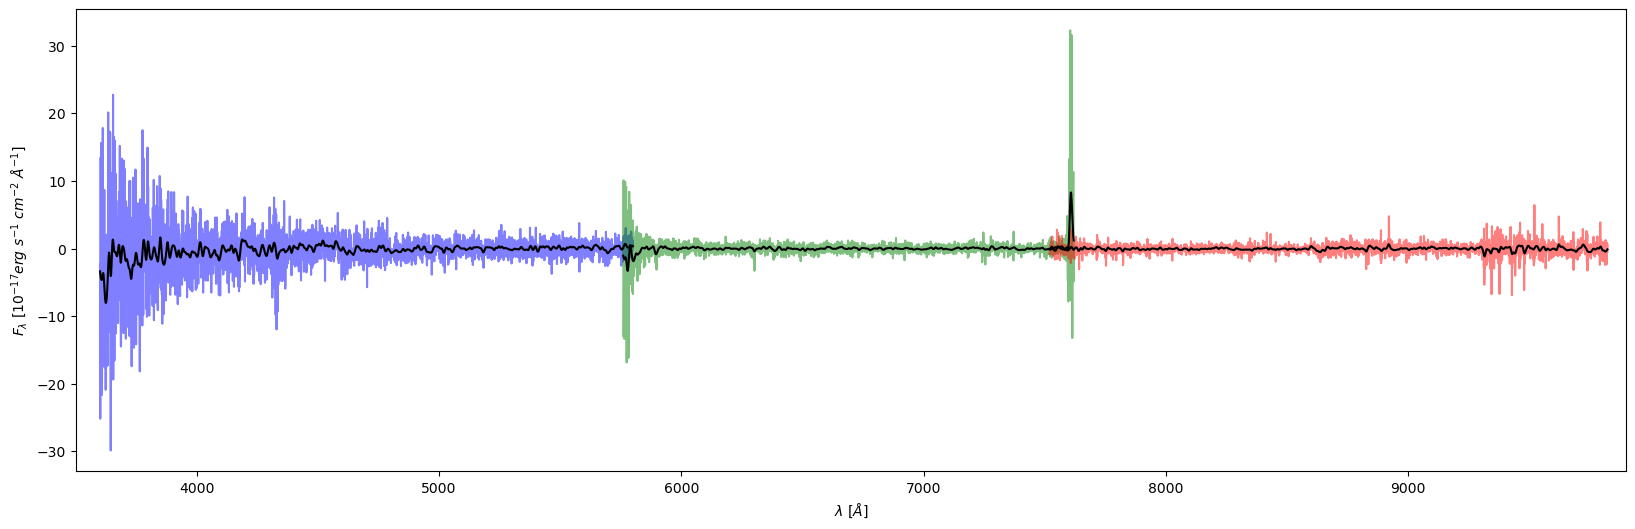

In [42]:
# Plotting this spectra -

plt.figure(figsize = (20, 6))
# Plot the spectrum from each arm (B,R,Z) in blue, green, red

plt.plot(coadd_spec.wave['b'], coadd_spec.flux['b'][0], color = 'b', alpha = 0.5)
plt.plot(coadd_spec.wave['r'], coadd_spec.flux['r'][0], color = 'g', alpha = 0.5)
plt.plot(coadd_spec.wave['z'], coadd_spec.flux['z'][0], color = 'r', alpha = 0.5)
# Over-plotting smoothed spectra in black for all the three arms
plt.plot(coadd_spec.wave['b'], convolve(coadd_spec.flux['b'][0], Gaussian1DKernel(5)), color = 'k')
plt.plot(coadd_spec.wave['r'], convolve(coadd_spec.flux['r'][0], Gaussian1DKernel(5)), color = 'k')
plt.plot(coadd_spec.wave['z'], convolve(coadd_spec.flux['z'][0], Gaussian1DKernel(5)), color = 'k')
plt.xlim([3500, 9900])
plt.xlabel('$\lambda$ [$\AA$]')
plt.ylabel('$F_{\lambda}$ [$10^{-17} erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')
plt.show()

In [43]:
# Combined Spectra - 

spec_combined = coaddition.coadd_cameras(coadd_spec)

In [44]:
spec_combined.wave

{'brz': array([3600. , 3600.8, 3601.6, ..., 9822.4, 9823.2, 9824. ])}

In [45]:
spec_combined.flux

{'brz': array([[ -2.28738523, -25.16202164, -13.15711403, ...,   0.85150206,
          -0.54910332,   0.5699138 ],
        [ -7.53224421,  -0.54388642,   1.34305024, ...,   0.97547662,
           0.90813172,   1.2492615 ],
        [  7.53519201,   8.06216621,   0.49498197, ...,   2.74760938,
           4.26255989,   2.55566525],
        ...,
        [ -0.91106331, -10.48640728, -19.30093002, ...,   2.20023727,
           0.4478786 ,   2.40744567],
        [ 15.49705887,  -2.30444455,  18.32552147, ...,  -0.17623073,
          -0.29352015,  -1.15515828],
        [  8.4434042 ,  38.53904343,  14.61012363, ...,  53.07349014,
          52.77047729,  58.88961029]])}

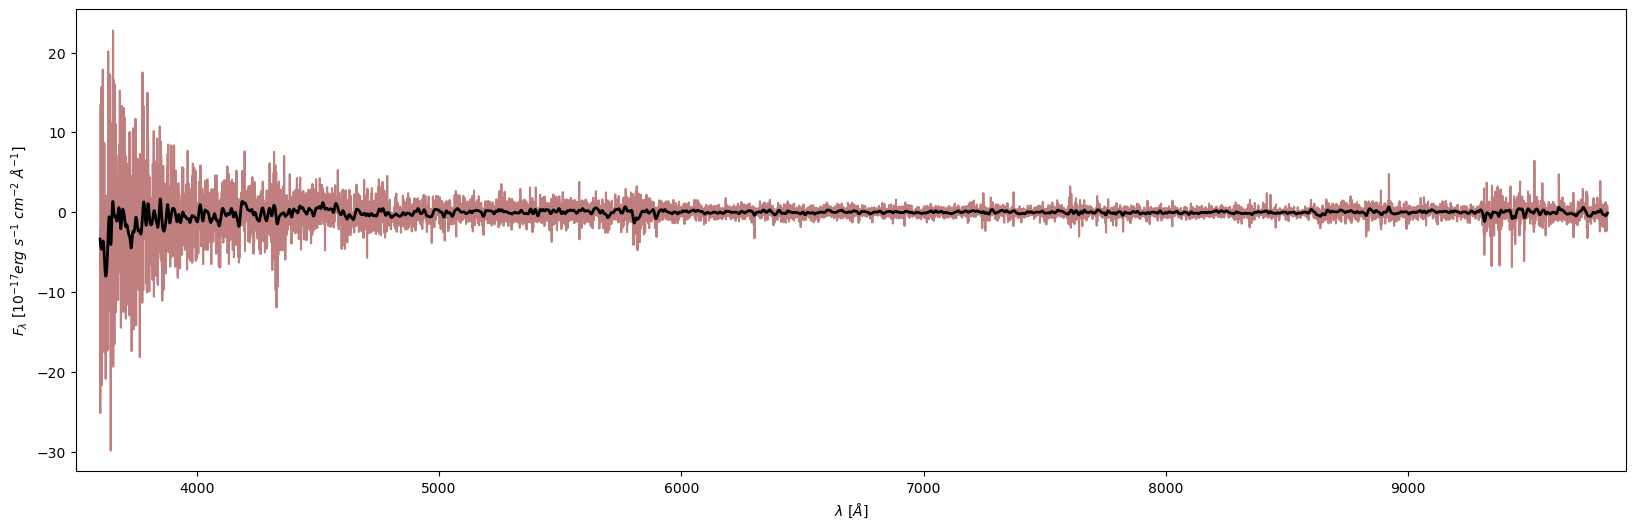

In [46]:
# Plotting this combined spectra - 

# Plotting this spectra -

plt.figure(figsize = (20, 6))
# Plot the combined spectrum in maroon
plt.plot(spec_combined.wave['brz'], spec_combined.flux['brz'][0], color = 'maroon', alpha = 0.5)
# Over-plotting smoothed spectra 
plt.plot(spec_combined.wave['brz'], convolve(spec_combined.flux['brz'][0], Gaussian1DKernel(5)), color = 'k', lw = 2.0)
plt.xlim([3500, 9900])
plt.xlabel('$\lambda$ [$\AA$]')
plt.ylabel('$F_{\lambda}$ [$10^{-17} erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')
plt.show()

0